Hw2.3 дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). 

In [43]:
# Прочитайте csv файл (використовуйте функцію read_csv)
# Виведіть перші п'ять рядків (використовується функція head)
import pandas as pd
file = pd.read_csv("bestsellers_with_categories.csv")
file.head(5)



,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [44]:
# Виведіть розміри датасету (використовуйте атрибут shape)
file.shape
# Відповідь: Про скільки книг зберігає дані датасет? - 550 книг

(550, 7)

In [45]:
file.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
file

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Первинне дослідження даних


In [46]:
# 1 Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
missing = (file.isnull().sum() / len(file)) * 100
print(missing)
# Відповідь: Чи є в якихось змінних пропуски? (Так / ні) - ні

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64


In [47]:
# 2 Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
unique_genres = file['genre'].unique()
print(unique_genres)

# Відповідь: Які є унікальні жанри? - 'Non Fiction' 'Fiction'


['Non Fiction' 'Fiction']


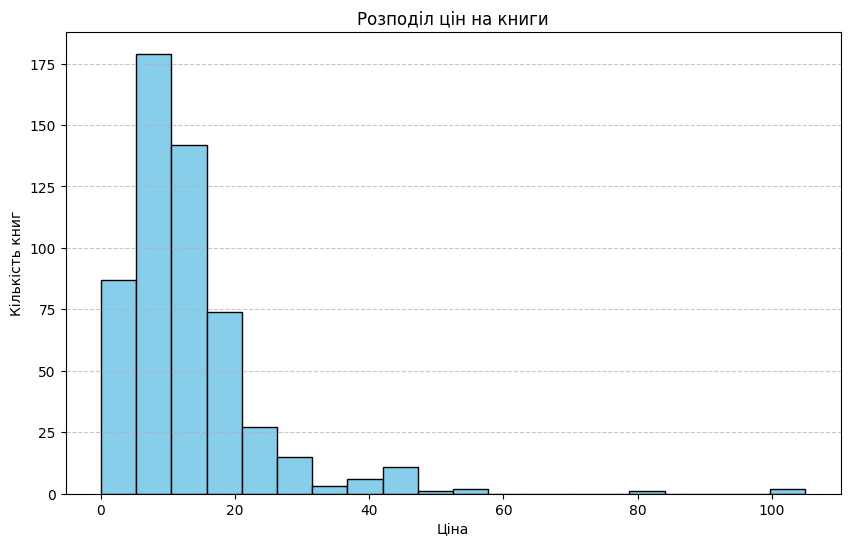

In [48]:
# 3 Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
import matplotlib.pyplot as plt
file['price'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue', figsize=(10, 6))

plt.title('Розподіл цін на книги')
plt.xlabel('Ціна')
plt.ylabel('Кількість книг')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [49]:
# 4 Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
max_price = file['price'].max()
min_price = file['price'].min()
mean_price = file['price'].mean()
median_price = file['price'].median()
print(max_price, min_price, mean_price, median_price)
# Відповідь: Максимальна ціна? 105
# Відповідь: Мінімальна ціна? 0
# Відповідь: Середня ціна? 13.1
# Відповідь: Медіанна ціна? 11

105 0 13.1 11.0


Пошук та сортування даних

In [50]:
max_rating = file['user_rating'].max()
books_with_max = file[file['user_rating'] == max_rating]
count_books = len(books_with_max)
print(max_rating)
print(count_books)
# Відповідь: Який рейтинг у датасеті найвищий? Відповідь: 4.9
# Відповідь: Скільки книг мають такий рейтинг? Відповідь: 52

4.9
52


In [51]:
book_max_reviews = file.loc[file['reviews'].idxmax()][['name', 'author', 'reviews']]
print(book_max_reviews)
# Відповідь: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing - Delia Owens

name       Where the Crawdads Sing
author                 Delia Owens
reviews                      87841
Name: 534, dtype: object


In [52]:
book = (
    file[file['year'] == 2015]          
    .nlargest(1, 'price')               
    [['name', 'price']]      
)
print(book)
# Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition

                                                  name  price
277  Publication Manual of the American Psychologic...     46


In [53]:
fict_b = file[(file['genre'] == 'Fiction') & (file['year'] == 2010)]
count_fict = len(fict_b)
print(count_fict)
# Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

20


In [54]:
books_49 = file[(file['user_rating'] == 4.9) & ((file['year'] == 2010) | (file['year'] == 2011))]
count_49 = len(books_49)
print(count_49)
# Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

1


In [55]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
books_under8 = file[(file['year'] == 2015) & (file['price'] < 8)]
sorted_books = books_under8.sort_values(by='price')
last_book = sorted_books.iloc[-1]
print(last_book[['name', 'author', 'price']])

# Відповідь: Яка книга остання у відсортованому списку? Відповідь:
# name      Old School (Diary of a Wimpy Kid #10)
# author                              Jeff Kinney
# price                                         7

name      Old School (Diary of a Wimpy Kid #10)
author                              Jeff Kinney
price                                         7
Name: 253, dtype: object


Агрегування даних та з'єднання таблиць

In [56]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
genre_price = file.groupby('genre')['price'].agg(['max', 'min'])
print(genre_price)
# Відповідь: Максимальна ціна для жанру Fiction: Відповідь 82
# Відповідь: Мінімальна ціна для жанру Fiction: Відповідь 0
# Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь 105
# Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь 0

             max  min
genre                
Fiction       82    0
Non Fiction  105    0


In [79]:
# Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
author_book = file.groupby('author')['name'].agg('count').reset_index()
author_book.columns = ['author', 'book_count']
author_book.shape
# Відповідь: Якої розмірності вийшла таблиця? Відповідь: (248, 2)


(248, 2)

In [58]:
max_books_author = author_book.loc[author_book['book_count'].idxmax()]

print(max_books_author['author'])
print(max_books_author['book_count'])

# Відповідь: Який автор має найбільше книг? Відповідь: Jeff Kinney
# Відповідь: Скільки книг цього автора? Відповідь: 12

Jeff Kinney
12


In [59]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні
author_avg_rat = file.groupby('author')['user_rating'].agg('mean').reset_index()
author_avg_rat.columns = ['author', 'avg_rating']
min_avg_author = author_avg_rat.loc[author_avg_rat['avg_rating'].idxmin()]
print(min_avg_author)

# Відповідь: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
# Відповідь: Який у цього автора середній рейтинг? Відповідь: 3.9

author        Donna Tartt
avg_rating            3.9
Name: 71, dtype: object


In [69]:
# З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
merged = pd.concat([author_book, author_avg_rat], axis=1)
merged.columns = ['author', 'book_count', 'author1', 'avg_rating']
merged = merged.drop('author1', axis=1)
merged


,author,book_count,avg_rating
0,Abraham Verghese,2,4.600000
1,Adam Gasiewski,1,4.400000
2,Adam Mansbach,1,4.800000
3,Adir Levy,1,4.800000
4,Admiral William H. McRaven,1,4.700000
...,...,...,...
243,Walter Isaacson,3,4.566667
244,William Davis,2,4.400000
245,William P. Young,2,4.600000
246,Wizards RPG Team,3,4.800000


In [77]:
# Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
merged = merged.sort_values(by=['book_count', 'avg_rating'])
merged.head(5)
# Відповідь: Який автор перший у списку? Muriel Barbery	

,index,author,book_count,avg_rating
0,171,Muriel Barbery,1,4.0
1,43,Chris Cleave,1,4.1
2,109,Ian K. Smith M.D.,1,4.1
3,186,Pierre Dukan,1,4.1
4,81,Elizabeth Strout,1,4.2


Візуалізація

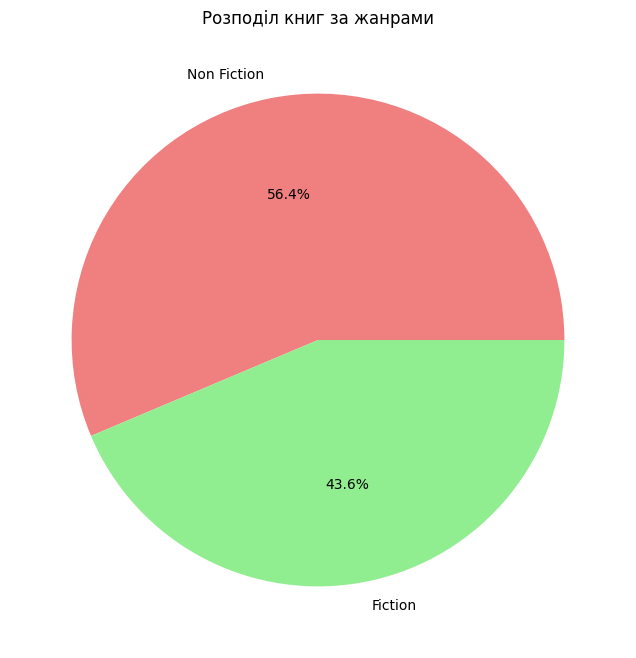

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(file['genre'].value_counts(), labels=file['genre'].value_counts().index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Розподіл книг за жанрами')
plt.show()


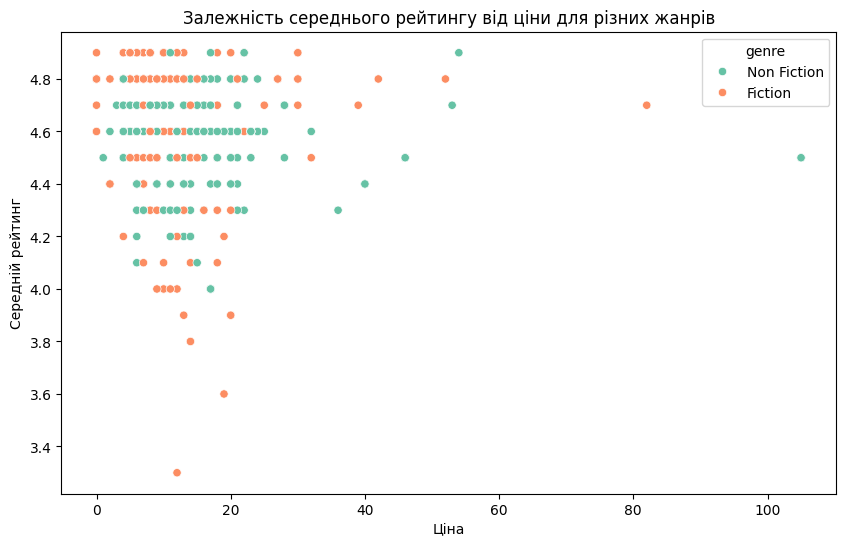

In [87]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='user_rating', data=file, hue='genre', palette='Set2')
plt.title('Залежність середнього рейтингу від ціни для різних жанрів')
plt.xlabel('Ціна')
plt.ylabel('Середній рейтинг')
plt.show()

C:\Users\Veronika\AppData\Local\Temp\ipykernel_16696\1759324111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='year', y='price', data=file, palette='coolwarm')


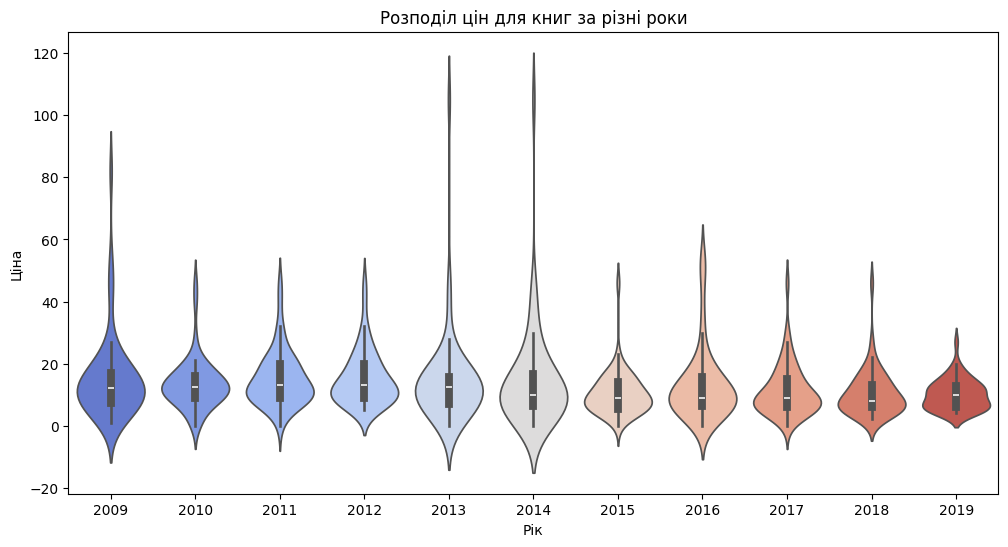

In [91]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='year', y='price', data=file, palette='coolwarm')
plt.title('Розподіл цін для книг за різні роки')
plt.xlabel('Рік')
plt.ylabel('Ціна')
plt.show()